In [1]:
import mplfinance as mpf
import pymssql
import json
import pandas as pd
import numpy as np

db_settings = {
    "host": "127.0.0.1",
    "port": 1433,
    "user": "test",
    "password": "test",
    "database": "ncudatabase",
    "charset": "utf8"
}

In [2]:
try:  
    conn = pymssql.connect(**db_settings)
    with conn.cursor() as cursor:
        command = "SELECT date, o, h, l, c, v FROM stock_data WHERE date like '2021-12-%' and stock_code = '2330';"
        cursor.execute(command)
        result = cursor.fetchall()
except Exception as ex:
    print(ex)

conn.close()

In [3]:
arr = []
for r in result:
    r = list(r)
    r[0] = r[0];
    r[1] = float(r[1])
    r[2] = float(r[2])
    r[3] = float(r[3])
    r[4] = float(r[4])
    r[5] = float(r[5])
    arr.append(r)

In [4]:
arr_df = pd.DataFrame(arr)
arr_df.index = pd.to_datetime(arr_df[0])
arr_df = arr_df.drop(columns=[0])
arr_df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
arr_df.index.name = "Date"
arr_df

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-01,596.0,603.0,594.0,600.0,15695.0
2021-12-02,605.0,615.0,602.0,615.0,40629.0
2021-12-03,614.0,614.0,606.0,608.0,16197.0
2021-12-06,603.0,609.0,600.0,600.0,19139.0
2021-12-07,602.0,607.0,597.0,607.0,22160.0
2021-12-08,614.0,614.0,602.0,602.0,15634.0
2021-12-09,606.0,608.0,602.0,608.0,9231.0
2021-12-10,605.0,608.0,602.0,605.0,9215.0
2021-12-13,609.0,610.0,601.0,601.0,12503.0


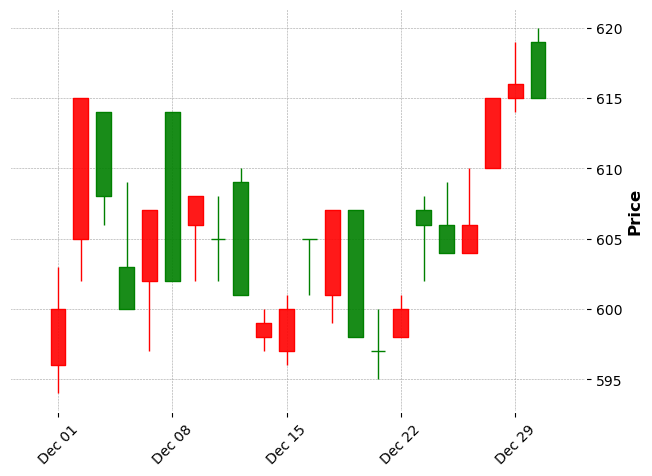

In [5]:
mc = mpf.make_marketcolors(up='r',
                           down='g',
                           edge='',
                           wick='inherit',
                           volume='inherit')
s = mpf.make_mpf_style(base_mpf_style='charles', marketcolors=mc)

mpf.plot(arr_df, type='candle', style=s)